In [2]:
# install all libraries
!pip install hopsworks shap pandas numpy --upgrade

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.5/79.5 kB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.2/91.2 kB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 5.0 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of shap to determine which version is compatible with other requirements. This could take a while.
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 766.1/766.1 kB 20.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 kB 10.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.2/44.2 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 42.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 139.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.0/18.0 MB 128.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.6/258.6 kB 21.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━

In [1]:
!pip install hopsworks==4.2.*


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.6/90.6 kB 3.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 665.0/665.0 kB 16.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.2/44.2 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.7/11.7 MB 68.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 42.0 MB/s eta 0:00:00
  Created wheel for avro: filename=avro-1.11.3-py2.py3-none-any.whl size=123961 sha256=6a4215214e1432007224f037397550d8e4709f88b4a765c250317c93ddbd23c9
  Stored in directory: /root/.cache/pip/wheels/3a/82/d3/8eb96fda033c7f1661086e2f8afb13f04817886d28b12f1e72
Successfully built avro
  Attempting uninstall: sqlalchemy
    Found existing installation: SQLAlchemy 2.0.41
    Uninstalling SQLAlchemy-2.0.41:
      Successfully uninstalled SQLAlchemy-2.0.41
  Attempting uni

In [11]:
import hopsworks
import joblib
import shap
import matplotlib.pyplot as plt
import pandas as pd
import os
from google.colab import userdata
import seaborn as sns
import numpy as np

In [3]:
import hopsworks

project = hopsworks.login()
fs = project.get_feature_store()


Copy your Api Key (first register/login): https://c.app.hopsworks.ai/account/api/generated

Paste it here: ··········

Logged in to project, explore it here https://c.app.hopsworks.ai:443/p/1335449


In [7]:
# Get your Feature Group
aqi_fg = fs.get_feature_group(name="islamabad_aqi_v12", version=1)

In [8]:
raw_df = aqi_fg.read()


Finished: Reading data from Hopsworks, using Hopsworks Feature Query Service (1.03s) 


***EDA Graphs and Insights***





In [12]:
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (12,5)

**1️⃣ AQI Over Time**

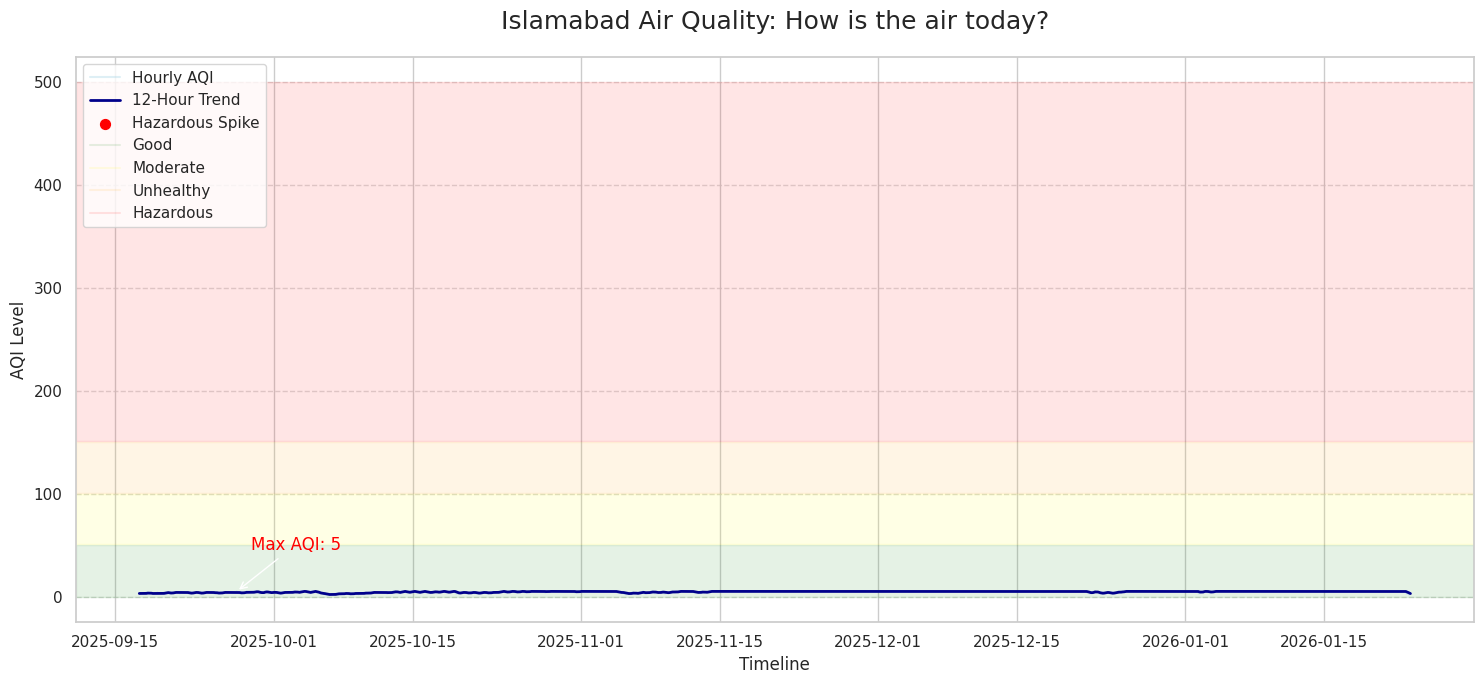

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

# Sort by datetime
raw_df = raw_df.sort_values('datetime')

# 12-hour rolling average
raw_df['aqi_smooth'] = raw_df['aqi'].rolling(window=12, min_periods=1).mean()

plt.figure(figsize=(15, 7))

# Hourly AQI (light)
plt.plot(raw_df['datetime'], raw_df['aqi'], color='lightblue', alpha=0.4, label='Hourly AQI')

# Trend line
plt.plot(raw_df['datetime'], raw_df['aqi_smooth'], color='darkblue', linewidth=2, label='12-Hour Trend')

# AQI Zones
plt.axhspan(0, 50, color='green', alpha=0.1)
plt.axhspan(51, 100, color='yellow', alpha=0.1)
plt.axhspan(101, 150, color='orange', alpha=0.1)
plt.axhspan(151, 500, color='red', alpha=0.1)

# Highlight hazardous hours
hazardous = raw_df[raw_df['aqi'] > 150]
plt.scatter(hazardous['datetime'], hazardous['aqi'], color='red', s=50, label='Hazardous Spike')

# Annotate worst AQI
if not raw_df.empty:
    worst = raw_df.loc[raw_df['aqi'].idxmax()]
    plt.annotate(f"Max AQI: {int(worst['aqi'])}",
                 xy=(worst['datetime'], worst['aqi']),
                 xytext=(10, 30), textcoords='offset points',
                 arrowprops=dict(facecolor='black', arrowstyle='->'),
                 fontsize=12, color='red')

plt.title("Islamabad Air Quality: How is the air today?", fontsize=18, pad=20)
plt.xlabel("Timeline", fontsize=12)
plt.ylabel("AQI Level", fontsize=12)

# Custom legend
plt.plot([], [], color='green', alpha=0.1, label='Good')
plt.plot([], [], color='yellow', alpha=0.1, label='Moderate')
plt.plot([], [], color='orange', alpha=0.1, label='Unhealthy')
plt.plot([], [], color='red', alpha=0.1, label='Hazardous')
plt.legend(loc='upper left', frameon=True)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


**2️⃣ PM2.5 vs AQI**

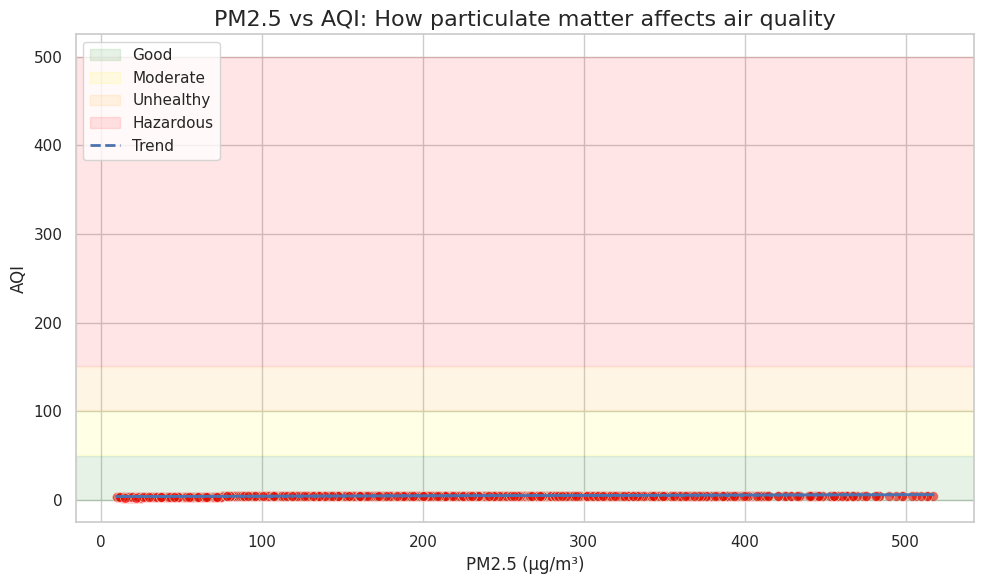

In [22]:
sns.set(style="whitegrid")

plt.figure(figsize=(10,6))

# Scatter plot with alpha for visibility
sns.scatterplot(x='pm2_5', y='aqi', data=raw_df, color='red', alpha=0.6, s=50)

# Add AQI zones as horizontal bands
plt.axhspan(0, 50, color='green', alpha=0.1, label='Good')
plt.axhspan(51, 100, color='yellow', alpha=0.1, label='Moderate')
plt.axhspan(101, 150, color='orange', alpha=0.1, label='Unhealthy')
plt.axhspan(151, 500, color='red', alpha=0.1, label='Hazardous')

# Trend line (linear)
z = np.polyfit(raw_df['pm2_5'], raw_df['aqi'], 1)
p = np.poly1d(z)
plt.plot(raw_df['pm2_5'], p(raw_df['pm2_5']), "b--", linewidth=2, label='Trend')

plt.title("PM2.5 vs AQI: How particulate matter affects air quality", fontsize=16)
plt.xlabel("PM2.5 (µg/m³)", fontsize=12)
plt.ylabel("AQI", fontsize=12)

# Custom legend
plt.legend(loc='upper left', frameon=True)
plt.tight_layout()
plt.show()


**3️⃣ AQI by Hour of Day**

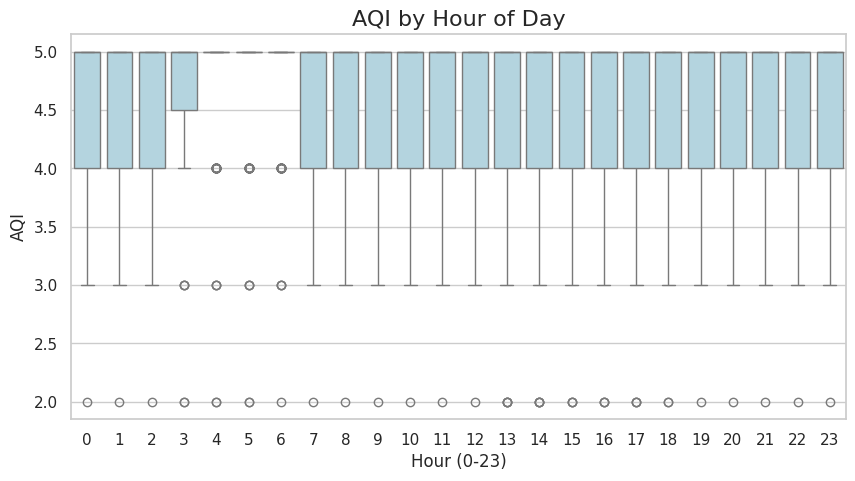

In [15]:
raw_df['hour'] = raw_df['datetime'].dt.hour
plt.figure(figsize=(10,5))
sns.boxplot(x='hour', y='aqi', data=raw_df, color='lightblue')
plt.title("AQI by Hour of Day", fontsize=16)
plt.xlabel("Hour (0-23)")
plt.ylabel("AQI")
plt.show()

**4️⃣ AQI by Weekday**


Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.



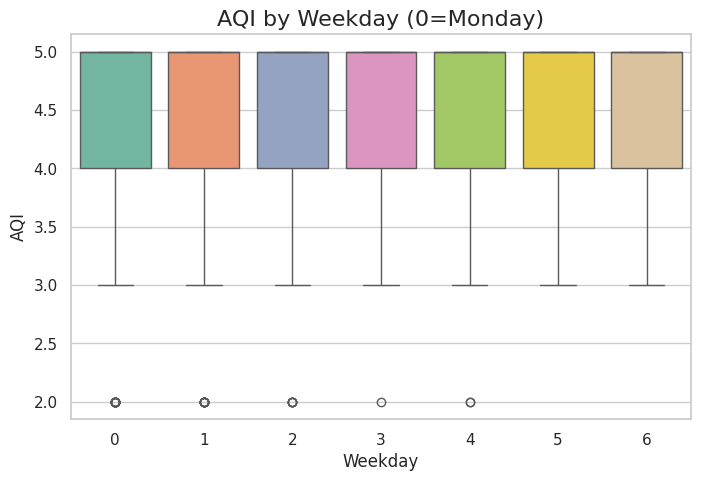

In [16]:
raw_df['weekday'] = raw_df['datetime'].dt.weekday
plt.figure(figsize=(8,5))
sns.boxplot(x='weekday', y='aqi', data=raw_df, palette="Set2")
plt.title("AQI by Weekday (0=Monday)", fontsize=16)
plt.xlabel("Weekday")
plt.ylabel("AQI")
plt.show()


**5️⃣ AQI vs Previous AQI (Lag 1)**

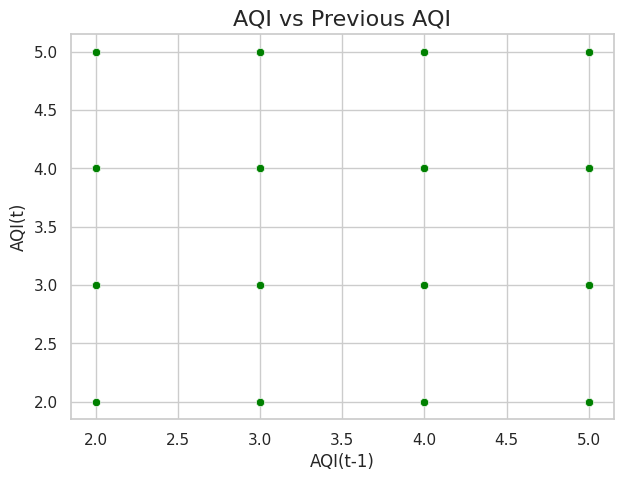

In [17]:
raw_df['aqi_lag_1'] = raw_df['aqi'].shift(1)
plt.figure(figsize=(7,5))
sns.scatterplot(x='aqi_lag_1', y='aqi', data=raw_df, color='green')
plt.title("AQI vs Previous AQI", fontsize=16)
plt.xlabel("AQI(t-1)")
plt.ylabel("AQI(t)")
plt.show()


**6️⃣ AQI Change Rate**

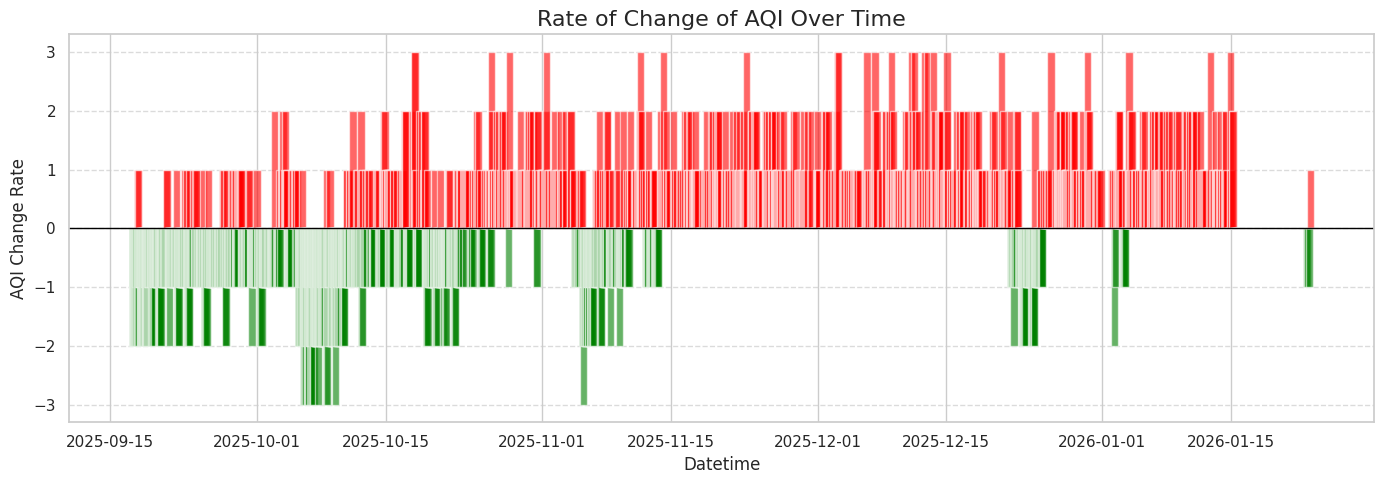

In [23]:
plt.figure(figsize=(14,5))

# Highlighting increases vs decreases
colors = raw_df['aqi_change_rate'].apply(lambda x: 'red' if x > 0 else 'green')
plt.bar(raw_df['datetime'], raw_df['aqi_change_rate'], color=colors, alpha=0.6)

plt.title("Rate of Change of AQI Over Time", fontsize=16)
plt.xlabel("Datetime")
plt.ylabel("AQI Change Rate")
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Optional: add zero line for reference
plt.axhline(0, color='black', linewidth=1)

plt.tight_layout()
plt.show()


**7️⃣ Optional: PM2.5 Rolling Average**

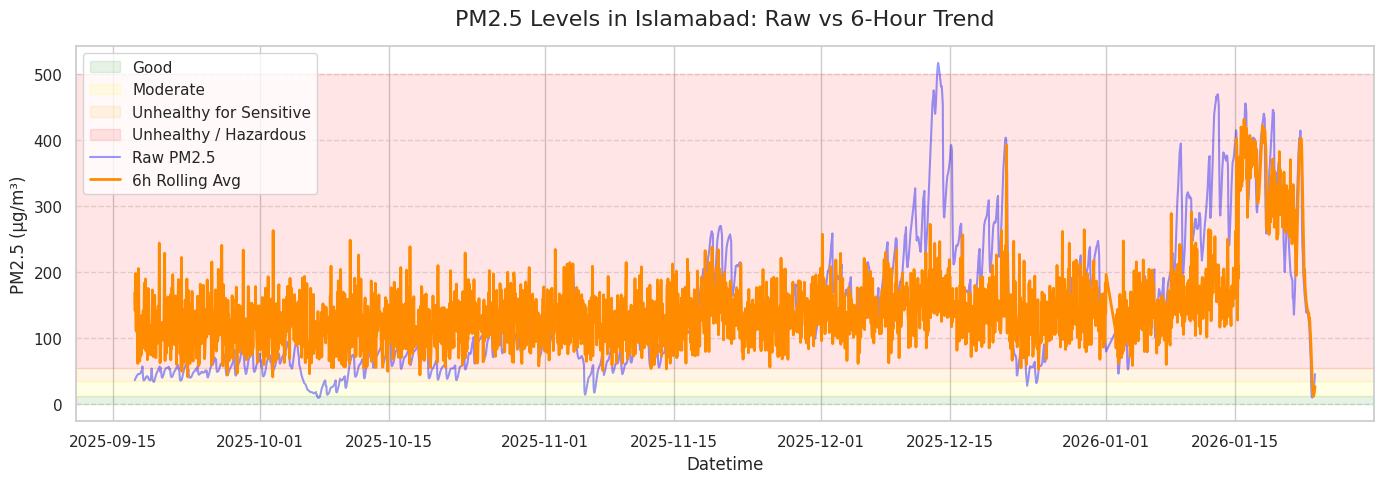

In [24]:
raw_df['pm2_5_rolling_6h'] = raw_df['pm2_5'].rolling(window=6, min_periods=1).mean()
plt.figure(figsize=(14,5))
plt.plot(raw_df['datetime'], raw_df['pm2_5'], label='Raw PM2.5', alpha=0.5)
plt.plot(raw_df['datetime'], raw_df['pm2_5_rolling_6h'], label='6h Rolling Avg', color='orange')
plt.title("PM2.5 Rolling Average (6h)", fontsize=16)
plt.xlabel("Datetime")
plt.ylabel("PM2.5 (µg/m³)")
plt.legend()
plt.show()